<a href="https://colab.research.google.com/github/AugustoPrestes/Aulas_Data_Science/blob/main/anota%C3%A7%C3%B5es_do_DataScience_do_Zero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science do Zero 
### Anotações

### Encontrando Conectores-Chave

In [2]:
#@title Texto de título padrão
# Recebendo os dados dos usuarios
users = [
{ "id": 0, "name": "Hero"},
{ "id": 1, "name": "Dunn"},
{ "id": 2, "name": "Sue"},
{ "id": 3, "name": "Chi"},
{ "id": 4, "name": "Thor"},
{ "id": 5, "name": "Clive"},
{ "id": 6, "name": "Hicks"},
{ "id": 7, "name": "Devin"},
{ "id": 8, "name": "Kate"},
{ "id": 9, "name": "Klein"}]

# Recebendo as conexões de amizades
friendship_pairs = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),(4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

# Recebendo os interesses dos usuarios
interests = [
(0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"), 
(0, "Spark"), (0, "Storm"), (0, "Cassandra"), (1, "NoSQL"), 
(1, "MongoDB"), (1, "Cassandra"), (1, "HBase"), (1, "Postgres"), 
(2, "Python"), (2, "scikit-learn"), (2, "scipy"), (2, "numpy"), 
(2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
(3, "statistics"), (3, "regression"), (3, "probability"), (4, "machine learning"), 
(4, "regression"), (4, "decision trees"), (4, "libsvm"), (5, "Python"), 
(5, "R"), (5, "Java"), (5, "C++"), (5, "Haskell"), 
(5, "programming languages"), (6, "statistics"), (6, "probability"), (6, "mathematics"), 
(6, "theory"), (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
(7, "neural networks"), (8, "neural networks"), (8, "deep learning"), (8, "Big Data"), 
(8, "artificial intelligence"), (9, "Hadoop"), (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

# Recebendo a informacao de salario e de experiencia dos usuarios de forma anonima

salaries_and_tenures = [(83000, 8.7), (88000, 8.1), (48000, 0.7), (76000, 6), (69000, 6.5), (76000, 7.5), (60000, 2.5), (83000, 10), (48000, 1.9), (63000, 4.2)]

print("ok")

ok


In [3]:
# Criando um dict com dict compreenshion
friendships = {user['id']: [] for user in users}

print(friendships)

{0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}


In [4]:
# Identificando os pares dos amigos e unindo conforme a juncao da lista friendship_pairs
for i, j in friendship_pairs:
    friendships[i].append(j) # Adicionando o j como amigo do i
    friendships[j].append(i) # Adicionando o i como amigo do j

print(friendships)

{0: [1, 2], 1: [0, 2, 3], 2: [0, 1, 3], 3: [1, 2, 4], 4: [3, 5], 5: [4, 6, 7], 6: [5, 8], 7: [5, 8], 8: [6, 7, 9], 9: [8]}


In [5]:
# PRIMEIRA PERGUNTA 1- QUAL O NUMERO MEDIO DE AMIGOS

# Primeiro precisamos saber o numero total de conexoes
def number_friends(user):
    """ Verificando quantos frinds cada user possui """
    user_id = user['id']
    friend_ids = friendships[user_id]
    return len(friend_ids)

# Somando todas as conexoes 
total_connections = sum(number_friends(user) for user in users) # total_connection == 24

# Agora para saber a media de conexoes vamos dividir pelo numero de users 
num_users = len(users)
avg_connections = total_connections / num_users

avg_connections

2.4

In [6]:
#   SEGUNDA PERGUNTA 2- COMO ORDERNAR AS PESSOAS MAIS CONECTADAS

# Passando a quantidade de conexoes de cada user
num_friends_by_id = [(user['id'], number_friends(user)) for user in users]

# Classificando a lista do maior para o menor, utilizando a funcao lambda
num_friends_by_id.sort(key=lambda id_and_friends: id_and_friends[1], reverse=True)

num_friends_by_id # Cada par da dupla e (user_id, num_friends)

[(1, 3),
 (2, 3),
 (3, 3),
 (5, 3),
 (8, 3),
 (0, 2),
 (4, 2),
 (6, 2),
 (7, 2),
 (9, 1)]

In [7]:
#   TERCEIRA PERGUNTA 3- COMO ENCOTRAR AMIGOS DE AMIGOS

# Funcao para iterar os amigos e os amigos desses amigos
def foaf_ids_bad(user):
    """foaf significa "friend of friend" ou amigo de amigo"""
    return [foaf_id for friend_id in friendships[user["id"]] for foaf_id in friendships[friend_id]]

# VErificando o FOAF do user id[0]
foaf_ids_bad(users[0])

[0, 2, 3, 0, 1, 3]

In [8]:
#   QUARTA PERGUNTA 4- COMO ENCOTRAR AMIGOS DE AMIGOS SEM RETORNAR O AMIGO CONHECIDO

from collections import Counter

# Funcao que mostra a quantidade de amigos em comum com outro que tem amigos em comum
def friends_of_friends(user):
    user_id = user['id']
    return Counter(
        foaf_id for friend_id in friendships[user_id] # Para cada amigo meu
        for foaf_id in friendships[friend_id] # Encontre os amigos deles
            if foaf_id != user_id # Que nao seja eu
            and foaf_id not in friendships[user_id] # E que nao sejam meus amigos
    )

friends_of_friends(users[0])

Counter({3: 2})

In [9]:
#   QUINTA PERGUNTA 5- COMO CONECTAR AS PESSOAS PELOS INTERESSES EM COMUM

# Encontrando usuarios com os interesses parecido, por pesquisa individual
def data_scientists_who_like(target_interest):
    """ Encontrando os ids dos usuario com o mesmo interesse """
    return [user_id
            for user_id, user_interest in interests
                if user_interest == target_interest]


data_scientists_who_like(users[9])


[]

In [10]:
# Encontrando usuarios com o mesmo interesse e salvando em uma dict

# Construindo um indice de interesses para os usuarios
from collections import defaultdict

# As chaves serao interesses e os valores uma lista de user_id com o interesse em comum
user_ids_by_interest = defaultdict(list)

for user_id, interest in interests:
    user_ids_by_interest[interest].append(user_id)

user_ids_by_interest

defaultdict(list,
            {'Hadoop': [0, 9],
             'Big Data': [0, 8, 9],
             'HBase': [0, 1],
             'Java': [0, 5, 9],
             'Spark': [0],
             'Storm': [0],
             'Cassandra': [0, 1],
             'NoSQL': [1],
             'MongoDB': [1],
             'Postgres': [1],
             'Python': [2, 3, 5],
             'scikit-learn': [2, 7],
             'scipy': [2],
             'numpy': [2],
             'statsmodels': [2],
             'pandas': [2],
             'R': [3, 5],
             'statistics': [3, 6],
             'regression': [3, 4],
             'probability': [3, 6],
             'machine learning': [4, 7],
             'decision trees': [4],
             'libsvm': [4],
             'C++': [5],
             'Haskell': [5],
             'programming languages': [5],
             'mathematics': [6],
             'theory': [6],
             'Mahout': [7],
             'neural networks': [7, 8],
             'deep learning': 

In [11]:
# As chaves serao os user_ids e os valores uma lista de interesses do usuario
interests_by_user_id = defaultdict(list)

for user_id, interest in interests:
    interests_by_user_id[user_id].append(interest)

interests_by_user_id

defaultdict(list,
            {0: ['Hadoop',
              'Big Data',
              'HBase',
              'Java',
              'Spark',
              'Storm',
              'Cassandra'],
             1: ['NoSQL', 'MongoDB', 'Cassandra', 'HBase', 'Postgres'],
             2: ['Python',
              'scikit-learn',
              'scipy',
              'numpy',
              'statsmodels',
              'pandas'],
             3: ['R', 'Python', 'statistics', 'regression', 'probability'],
             4: ['machine learning', 'regression', 'decision trees', 'libsvm'],
             5: ['Python',
              'R',
              'Java',
              'C++',
              'Haskell',
              'programming languages'],
             6: ['statistics', 'probability', 'mathematics', 'theory'],
             7: ['machine learning',
              'scikit-learn',
              'Mahout',
              'neural networks'],
             8: ['neural networks',
              'deep learning',
       

In [12]:
# Iterando os interesses e contando cada aparicao dos usuarios, com o mesmo interesse
def most_commu_interests_with(user):
    return Counter(
    interested_user_id
    for interest in interests_by_user_id[user['id']]
    for interested_user_id in user_ids_by_interest[interest]
    if interested_user_id != user['id']
    )

most_commu_interests_with(users[0])

Counter({9: 3, 8: 1, 1: 2, 5: 1})

In [13]:
# Analisando a media salarial por anos deexperiencias
salary_by_tenure = defaultdict(list)

# Construindo o dict com os anos como chave, os valores as listas de salarios por anos de experiencias
for salary, tenure in salaries_and_tenures:
    salary_by_tenure[tenure].append(salary)

# Dict com os anos como chave, e cada valor e o salario medio associado ao tempo de experiencia
avg_salary_by_tenure = {tenure: sum(salaries) / len(salaries) 
                        for tenure, salaries in salary_by_tenure.items()}

avg_salary_by_tenure

{8.7: 83000.0,
 8.1: 88000.0,
 0.7: 48000.0,
 6: 76000.0,
 6.5: 69000.0,
 7.5: 76000.0,
 2.5: 60000.0,
 10: 83000.0,
 1.9: 48000.0,
 4.2: 63000.0}

In [14]:
# Criando categorias de experiencias
def tenure_bucket(tenure):
    if tenure < 2:
        return "Menos de dois anos"
    elif tenure < 5:
        return "Entre dois e cinco anos"
    else:
        return "Mais de cinco anos"


# Agrupando os salarios por categoria
# As chaves são categoria de anos de experiência, os valores são as listas de salários associadas a categoria em questão.
salary_by_tenure_bucket = defaultdict(list)
for salary, tenure in salaries_and_tenures:
    bucket = tenure_bucket(tenure)
    salary_by_tenure_bucket[bucket].append(salary)

# Calculando a media salaria de cada grupo
# As chaves sao categorias, os valores a media salaria de cada categoria
avg_salary_by_bucket = {tenure_bucket: sum(salaries) / len(salaries)
                        for tenure_bucket, salaries in salary_by_tenure_bucket.items()}


avg_salary_by_bucket

{'Mais de cinco anos': 79166.66666666667,
 'Menos de dois anos': 48000.0,
 'Entre dois e cinco anos': 61500.0}

In [15]:
# Relacionando o tempo de experiencia com as contas pagas
def predict_paid_or_unpaid(years_experience):
    if years_experience < 3.0:
        return "paid"
    elif years_experience < 8.5:
        return "unpaid"
    else:
        return "paid"




In [16]:
# Escrevendo os interesses em minusculo, dividindo as palavras e contando o resultado
words_and_counts = Counter(word
                           for user, interest in interests
                           for word in interest.lower().split())

for word, count in words_and_counts.most_common():
    if count > 1:
        print(word, count)


big 3
data 3
java 3
python 3
learning 3
hadoop 2
hbase 2
cassandra 2
scikit-learn 2
r 2
statistics 2
regression 2
probability 2
machine 2
neural 2
networks 2


## Intensivo de Python

In [17]:
#Criando ambiente de virtual no anaconda
$ conda create -n {nome no ambiente} python={versao do python}

# Apos a criacao e necessario ativar o ambiente criado
$ conda acitivate {nome do ambiente}

# Para desativar 
$ conda deactivate

SyntaxError: invalid syntax (2643058419.py, line 2)

In [ ]:
# Para importor um modulo inteiro 
import 'modulo_name'

# para importar um valor especifico do modulo
from 'modulo_name' import 'funcoes'


In [ ]:
# Criando funcoes
def double(x):
    """ Retorna o dobro do valor informado """
    return x * 2
    
# Passando uma funcao como argumento
def apply_to_one(f):
    """ Chama a funcao f usando 1 como argumento """
    return f(1)
    
my_double = double

x = apply_to_one(my_double)

print(x)

In [ ]:
# Criando funcoes anonimas ou mais conhecidas como lambda functions
# nao e recomendado atribuir a labda a uma variavel
y = apply_to_one(lambda x: x + 4)


In [ ]:
# No pytho a barra inversa serve para modifica um caractere especial
tab_string = "\t" # representa o caractere tab
len(tab_string)


# Para utilizar o caractere da barra inversa e necessario criar uma string bruta com o r""
not_tab_string = r"\t"
len(not_tab_string)

#### EXCEÇÕES

In [ ]:
# As exceções que o python gera se não sçao tratadas retornan um erro no algoritimo
# Para tratarmos as excecoes utilizamos o try/except
try:
    print(0/0)

except ZeroDivisionError: print("cannot divide by zero")


#### LISTAS

In [ ]:
# Podemos obter um elemento de uma lista apartir da posicao do mesmo
x = list(range(0, 11))
zero = x[0] # Utilizando o indice para acessar o valor zero e atribuilo a variavel

# Filtrando uma lista utilizando o colchetes0
first_three = x[:3] 
three_to_end = x[3:]
second_to_four = x[1:5]
last_three = x[-3:]
without_first_and_last = x[1:-1]
copy_list = x[:] # Passando toas as posicoes da lista

# Podemos informar tambem o terceiro argumento que o passo da contagem
every_third = x[::3]  # out [0, 3, 6, 9]
five_to_three = x[5:2:-1]  # out [5, 4, 3]

# Podemos utilizano o in para verificar a existencia de um valor em uma lista ou qualquer outro iteravel
# Por analisar todos os itens da lista so utilize em listas pequenas
1 in [1, 2, 3] # Out Verdadeiro
0 in [1, 2, 3] # Out Falso

# Para concatenas uma lista podemos utilizar o extend adicionando outra colecao
x = [1, 2, 3] 
x.extend([4, 5, 6]) # out [1, 2, 3, 4, 5, 6]




#### Tuplas

In [ ]:
# Tuplas soa iguais as listas, porem nao podem ser modificadas
my_tuple = (1, 2)  # primeira forama de criar uma tupla 
outher_tupla = 1, 2  # Segunda forma de Criar uma tupla

try:
    my_tuple[1] = 3

except TypeError:
    print("cannot modify a tuple")


In [ ]:
# As tuplas sao mais eficazes em funcoes para retornar multiplos valores
# Criando funcao com tuplas
def sum_and_product(x, y):
    return (x + y), (x * y)

sp = sum_and_product(2, 3)
sp # (5, 6)

s, p = sum_and_product(5, 10)
s, p # (15, 50)

#### Dicionarios

In [ ]:
# Sao similares a uma lista porem com o indice explicito e descritos por chaves ou inves de colchetes
grades = {"joel": 20, "Tim": 80} # Dicionario literal

# Para pesquisar o valor de uma chave, usamos o colchetes para
# Dessa forma estaamos passando o indice do valor que desejamos
joel_grades = grades["joel"] # out 20




In [ ]:
# Caso seja pesquisado um valor que o dict nao possui o python retornara um KeyError
try:
    kates_grade = grades["Kate"]

except KeyError:
    print("Key don't found") # Out Key don't found




In [ ]:
# Para verificar a existencia de uma chave em uma dict, utilizamos o in
joel_has_grade = "joel" in grades # Out True
kate_has_grade = "kate" in grades # Out False


In [ ]:
# Ou podemos utilizar o metodo get que retorna um valor padra ao inves de retornar uma excecao, quando procuramos uma chaves inexistente
joel_grade = grades.get("joel", 0) # Retorna o valor associado a chave
kates_grade = grades.get("kate", 0) # Retona o valor padrao que foi informado, pois nao existe chave kate
no_ones = grades.get("No one") # Retorna none


In [ ]:
# Podemos atribui pares de valor-chave usando os colchetes
grades["TIm"] = 99 # Substitui o valor anterior
grades["Kate"] = 100 # Adiciona o novo valor-chave
num_students = len(grades) 


In [ ]:
# Alem das chaves podemos conferir por todas elas
tweet_keys = tweet.keys() # Iteravel para as chaves
tweet_values = tweet.values() # Iteravel para os valores
tweet_items = tweet.items() # Iteravel para as tuplas (chave, valor)

"user" in tweet_keys # Verdadeiro, mas não é Pythonic
"user" in tweet # forma Pythonic de verificar as chaves
"joelgrus" in tweet_values # Verdadeiro (lento, mas é a única forma de verificar)

In [ ]:
# Contando as palavras em um texto e adionando caso a palavra ainda nao tenha sido contada
word_counts = {}
for word in document:
    if word in word_counts
        wored_counts[word] += 1
    else:
        word_counts[word] = 1
        

In [ ]:
# Repetindo o algoritimo acima, porem utilizando o metodo try/except para as excecoes
word_counts = {}
for word in document:
    try:
        word_counts[word] += 1
    except KeyError:
        word_counts[word] = 1

In [ ]:
# Terceira maneira utilizando o metodo get()
text = "A expressão Lorem ipsum em design gráfico e editoração é um texto padrão em latim utilizado na produção gráfica para preencher os espaços de texto em publicações para testar e ajustar aspectos visuais antes de utilizar conteúdo real."
document = text.split(" ")

word_counts = {}
for word in document:
    previous_count = word_counts.get(word, 0)
    word_counts[word] = previous_count + 1
    
print(word_counts)


#### DEFAULTDICT

In [ ]:
# Utilizando o Defaultdict para o contar as palavras do texto
from collections import defaultdict

word_counts = defaultdict(int)
word_counts[word] += 1

word_counts

In [ ]:
# Tambem podemos utilizar o defaultsict para list, dict e outras funcoes
dd_list = defaultdict(list) # A funcao list passada como parametro cria uma lista vazia
dd_list[2].append(1) # out {2: [1]}, agora a dd_list possui o primeiro valor com uma chave e valor

dd_dict = defaultdict(dict) # A funcao dict passada como parametro cria uma dict vazia
dd_dict["joel"]["City"] = "Seattle" # Out {"Joel": {"City": "Seattle"}} 

dd_pair = defaultdict(lambda: [0, 0])
dd_pair[2][1] = 1 # Out {2: [0, 1]},  Agora a dd_pair contem

#### CONTADORES

In [ ]:
# O Counter (ou contador) conta as chaves mapeando os valores, parecido com o defaultdict
from collections import Counter

c = Counter([0, 1, 2, 0]) # Out Counter({0: 2, 1: 1, 2: 1})

# O counter e uma forma mais simples de resolver o problema do word_counts
word_counts = Counter(document)


In [ ]:
# O most_common tambem pode ser usado para contar as aparicoes das palavras
# Imprimindo as 10 palavras mais comuns
for word, count in word_counts.most_common(10):
    print(word, count)

#### CONJUNTOS

In [ ]:
# O set e um conjunto de elemento distintos, utilizamos chaves para listar seus conteudos
# Nao podemos passar uma chave vazia pois isso significa uma dict vazia, devemos utilizar o set()
s = set()
s.add(1) # Out {1}
s.add(2) # Out {1, 2}


#### FLUXO DE CONTROLE

In [ ]:
# O fluxo de controle e uma forma logica de utilizar os condicionais de Python

# usando o loop while
x = 0

while x < 10:
    print(f"{x} menor que 10")
    x = x + 1


In [ ]:
# Usando o for e o in
for x in range(10):
    print(f"{x} menor que 10")
    
# Para utilizar uma logica mais complexa podemos utilizar da seguinte forma
for x in range(10):
    if x == 3:
        continue # Vai imediatamente para a proxima iteracap
    if x == 5:
        break # Para o loop imediatamente
    print(x)
        

#### VERACIDADE

In [ ]:
# No python, podemos inserir qualquer valor que indique um boll
# Todos os exemplos abaixo são Falso
False
None
[]
{}
""
set()
0
0.0

In [ ]:
# Forma de verificar a veracidade de todos os items de um iteravel
all([True, 1, {3}]) # True, todos são verdadeiros
all([True, 1, {}]) # False, {} é falso
any([True, 1, {}]) # True, True é verdadeiro
all([]) # True, não há nenhum elemento falso na lista
any([]) # False, não há nenhum elemento verdadeiro na lista

#### CLASSIFICACAO

In [ ]:
# A lista em python tem o metodo sort para organizalas, e para nao baguncar podemos utilizar a funcao sorted, que retorna nova lista
x = [1, 2, 4, 3, -1] # Lista desorganizada
y = sorted(x) # y recebe x porem organizando os valores
x.sort() # Agora x esta organizado

In [ ]:
# A organizacao do sort() acontece do menor para o maior valor do iteravel
# Para organizar de forma decrescente temos que passar para o parametro reverse o valore True
x =sorted([-4, 1, -2, 3], key=abs, reverse=True)

# O parametro key para comparar os resultados de uma funcao especificada, por exemplo uma lambda function
wc = sorted(word_counts.items(), key=lambda word_and_count: word_and_count[1], reverse=True)

#### COMPREENSOES DE LISTAS 

In [ ]:
# O list comprehension e a forma pythonica de transformar um iteravel em oputro
even_numbers = [x for x in range(5) if x % 2 == 0]  # Out [0, 2, 4]
squares = [x * x for x in range(5)] # Out [0, 1, 4, 9, 16]
even_squares = [x * x for x in even_numbers] # Out [0, 4, 16]

# Da mesma forma, você pode transformar listas em dicionários ou conjuntos:
square_dict = {x: x * x for x in range(5)} # Out {0: 0, 1: 1, 2: 4, 3: 9, 4: 16} 
square_set = {x * x for x in [1, -1]} # Out {1}

In [ ]:
# Uma compreensao de lista pode conter multiplos fors
pairs = [(x, y) 
        for x in range(10)
        for y in range(10)] # Out [(0, 0), (0, 1), ..., (9, 8), (9, 9)]

pairs

In [ ]:
# Utilizando o resultado do for anterior para complementar o for posterior
increasting_pairs = [(x, y) 
        for x in range(10)
        for y in range(x + 1, 10)] # Out [(0, 0), (0, 1), ..., (9, 8), (9, 9)]

increasting_pairs

#### TESTES AUTOMATIZADOS E ASSERCAO

In [ ]:
# Para conferir se um codigo esta correto, podemos utilizar uma automatizacao chamada de assert
# A instrucao assert gera um AssertionError caso a condicao especificada nao seja verdadeira

assert 1 + 1 == 2
assert 1 + 1 == 2, "1 + 1 should equal 2 but didn't" # Podemos ate adicionar uma mensagem para caso de falha

In [ ]:
# O recomendado para o assert e declarar que a funcao esta funcionando como esperado
def smallest_item(xs):
    return min(xs)


assert smallest_item([10, 20, 30]) == 5, "Valor nao encontrado"


In [ ]:
# Outro uso, porem menos comum e na entrada de valores na funca
def smallest_item(xs):
    assert xs, "empty list has no smallest item"
    return min(xs)

smallest_item([1]) == 5


#### PROGRAMACAO ORIENTADA A OBJETOS

##### Utilizamos as classes para emcapsular dados e suas funcoes. E para deixar o codigo mais limpo 

In [ ]:
# O nome da classe tem que ser passado em PascalCase
class CountingClicker:
    """ A classe pode/deve ter um docstring, assim como as funcoes """

    # Por convencao cada funcao recebe um parametro, self, que se refere a instancia da classe especifica
    # No geral, toda classe possui um construtor chamado init, que recebe todos os parametros para construir uma instancia da classe
    def __init__(self, count = 0): # O metodo init inicia e termina com duble sublinhados ou dunder que representam comportamentos especiais
        self.count = count

    def __repr__(self): # O __repr_ e um metodo que produz a representacao de string de uma instancia de classe
        return f"CountingClicker(count={self.count})"
      
    def click(self, num_times = 1):
        """ Clique no contador algumas vezes """
        self.count += num_times
    
    def read(self):
        """Retorna o valor de count"""
        return self.count
    
    def reset(self):
        """Reseta o valor do count"""
        self.count = 0
        
        
clicker = CountingClicker() # Construindo a classe

assert clicker.read() == 0, "clicker shold start with count 0"

clicker.click() # Clicando 1 vez
clicker.click() # CLicando 2 vezes

assert clicker.read() == 2, "after two clicks, clicker shold have count 2"

clicker.reset() # Resetando o contador

assert clicker.read() == 0, "after reset, clicker should be back to 0"



In [ ]:
# Criando uma sub-classe que herda todoas as funcionalidades da classe-pai, porem com algumas alteracoes

class NoResetCliker(CountingClicker):
    def reset(self):
        pass


clicker2 = NoResetCliker()
assert clicker2.read() == 0, "Iniciando o contador com 0"
clicker2.click() # Clicando uma vez
assert clicker2.read() == 1, "Depois de uma clicada, deve contar 1 clique"
clicker2.reset() # Nao fara nada pois nao passamos o metodo pass para essa classe filho
assert clicker2.read() == 1, "Ainda deve contar 1 clique"


#### ITERAVEIS E GERADORES 

In [ ]:
# Normalmente iteramos em colecoes utilizando o for e in. No nosso caso, podemos criar geradores.
# Podemos criar geradores utilizando funcoes e o operador yeld
def generate_range(n):
    i = 0
    while i < n:
        yield i # cada chamada para yield produz um valor do gerador
        i += 1
        
# No exemplo a seguir o for conumira cada valor gerado pelo yield ate que nao sobre nenhum
for i in generate_range(10):
    print(f"i: {i}")

In [ ]:
# Com o gerador yield podemos ate mesmo criar uma sequencia infinita
def natural_number():
    n = 0
    while True:
        yield n
        n += 1
        
        if n == 10: # sempre utilizar uma logica de break quando trabalhar com valores infinitos
            break

for i in natural_number():
    print(f"i: {i}")

In [ ]:
# Podemos criar geradores colocando compreesoes de for entre parenteses
# A diferenca da compreensao de gerador para um list comprehension e apenas do parentese 
evens_below_20 = (i for i in generate_range(20) if i % 2 == 0)

# A compressao de gerador nao faz nada ate criarmos uma iteracao com o for ou o next
for i in evens_below_20:
    print(i)
    


In [18]:
# Quando queremos obter o valor e seu indice, de uma lista ou gerador utilizamos a funcao enumerate 
names = ["Alice","Bob","Charlie","Debbie"]

# O enumerate do python transforma os valores em pares (indice, valor)
for i, name in enumerate(names):
    print(f"Name position: {i} is {name}")


Name position: 0 is Alice
Name position: 1 is Bob
Name position: 2 is Charlie
Name position: 3 is Debbie


#### ALEATORIEDADE

In [19]:
# Para trabalharmos com numeros aleatorios utilizaremos o modulo random
import random as rd

rd.seed(10) # Assim, Os numeros aleatorios seram sempre os mesmos

# Gerando uma lista de numeros aleatorios entre 0 e 1
four_uniform_randoms = [rd.random() for _ in range(5)] # O _ e uma forma de gerar uma variavel anonima dentro de um iteravel


In [20]:
# Podemos utilizar tambem a funcao random.randrange, que recebe dois parametro (inicio, fim) e retorna um elemento aleatorio entre o range informado
rd.randrange(2, 11) # So aceita numeros inteiros



6

In [21]:
# Podemos reorganizar ums lista aleatoriamente utilizando o random.shuffle
up_to_ten = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

rd.shuffle(up_to_ten) 
up_to_ten

[4, 5, 6, 7, 2, 9, 10, 8, 1, 3]

In [22]:
# Para escolher um elemento de forma aleatoria de uma lista, podemos utilizar a funcao random.choice
my_best_friend = rd.choice(names) # Out um nome aleatorio da lista names
my_best_friend

'Bob'

In [23]:
# Para escolher uma amostra aleatoria de elementos de uma lista sem substituicao, podemos usar a funcao random.sample
lottery_numbers = range(1, 60)
winning_numbers = rd.sample(lottery_numbers, 6) # Primeiro passamos a lista, e depois a quantidade de elementos
winning_numbers

[39, 23, 25, 27, 19, 53]

In [24]:
# Para escolher uma amostra com substituicao de elementos
[random.choice(range(60)) for _ in range(6)]

NameError: name 'random' is not defined

#### EXPRESSOES REGULARES

In [ ]:
# As expressoes regulares sao formas de procurar texto
import re

re_examples = [ # Todos os exemplos abaixo sao True
    not re.match("a", "cat"), # 'cat' não começa com 'a'
     re.search("a", "cat"), # 'cat' contém um 'a'
    not re.search("c", "dog"), # 'dog' não contém um 'c'.
    3 == len(re.split("[ab]", "carbs")), # Divide em a ou b para ['c','r','s'].
    "R-D-"== re.sub("[0-9]", "-", "R1D2") # Substitui dígitos por traços. passando (oque_retirar, oque_colocar, o_texto)
]

assert all(re_examples), "all the regex examples should be True"

#### ZIP E DESCOMPATACAO DE ARGUMENTO

In [25]:
# Para compactar duas ou mais lista podemos utilizar a funca zip que treansforma varios iteraveis em um so iteravel em tuplas da funcao conrrespondente
# Caso as listas tenham tamanhos diferentes o zip para assim que a menor lista acabar
list1 = [1, 2, 3, 4]
list2 = ['a', 'b', 'c', 'd']

[pair for pair in zip(list1, list2)] # Out[(1, 'a'), (2, 'b'), (3, 'c'), (4, 'd')]


[(1, 'a'), (2, 'b'), (3, 'c'), (4, 'd')]

In [26]:
# Para descompactar uma lista podemos utilizar uma forma um pouco incomum
pair = [(1, 'a'), (2, 'b'), (3, 'c'), (4, 'd')]
numbers, letters = zip(*pair) # O * serve para descompactar o argumento (iteravel)
numbers, letters


((1, 2, 3, 4), ('a', 'b', 'c', 'd'))

In [27]:
# Podemos utilizar a descompactacao de armento com qualquer funcao
def add(a, b):
    return a + b

add(1, 2) # Retorna 3

try:
    add([1, 2])
except TypeError:
    print("Function add expects two inputs")
    
    

Function add expects two inputs


#### ARGS KWARGS 

In [43]:
# Exemplo de funcao de alta ordem que recebe uma funcao como entrada e retorna uma nova funca
def doubler(f):
    def g(x):
        return 2 * f(x)
    
    return g

# Isso funciona em alguns casos 
def f1(x):
    return x + 1


g = doubler(f1)
assert g(3) == 8, "(3 + 1) * 2 should equal 8"
assert g(-1) == 0, "(-1 + 1) * 2 should equal 0"

# Porem nao funciona em funcoes com mais de um argumento
def f2(x, y):
    return x + y

g = doubler(f2) 
try:
    g(1, 2)
except TypeError:
    print("As defined, g only takes one argument")

As defined, g only takes one argument


In [44]:
# Precisamo de uma funcao que receba argumentos arbitrarios, e fazemos isso usando a descompactacao de argumento
def magic(*args, **kwargs):
    print("unnames args:", args)
    print("keyword args:", kwargs)
    
# Quando definimos uma funcao com args temos uma tupla dos argumentos sem nome, e com o kwargs temos uma dict cin is argumentos nomeados
magic(1, 2, key="word", key2="word2") # Out unnames args: (1, 2) # keyword args: {'key': 'word', 'key2': 'word2'} 


unnames args: (1, 2)
keyword args: {'key': 'word', 'key2': 'word2'}


In [50]:
# Tambem funciona quando passamos uma lista, tupla ou dict para fornecer argumento a uma funcao
def other_way_magic(x, y, z):
    return x + y + z


listxy = [1, 2]
dictz = {"z": 3}

assert other_way_magic(*listxy, **dictz) == 6, "1 + 2 + should be 6"

In [55]:
# Esses recursao normalmente sao utilizados para produzir funcoes de alta ordem com entradas que aceitem argumentos arbitrarios
# De qualquer forma e mais correto indicar expressamente os argumentos recebidos pelas funcoes, portanto so usaremos args e kwargs em 
def double_corrent(f):
    """ Funciona para qualquer entrada recebida por f"""
    def g(*args, **kargs):
        """ Todo argumento fornecido para g deve ser transmitido para f """
        return 2 * f(*args, **kargs)
    return g


g = double_correct(f2)

assert g(1, 2) == 6, "souble shoukd work now"

#### ANOTACOES DE TIPO 

In [6]:
# O Python Por ser uma linguagem fortemente tipada, ou seja, que geralmente nao se importa com os tipos dos objetos se eles forem utilizados de forma valida
def add(a, b):
    return a + b

assert add(10, 5) == 15, "+ is valid for number" 
assert add([1, 2], [3]) == [1, 2, 3], "+ is valid for list"
assert add("hi ", "there") == "hi there", "+ is valid for string"


# Nao podemos inserir numeros em uma string
try:
    add(10, "cinco")

except TypeError:
    print("Cannot add an int to a string")
    

Cannot add an int to a string


In [12]:
# Ja em uma linguagem tipada estaticamente, as funcoes e objetos tem tipos especificos, porem no python >3.6 ja possuem uma funcionaliodade paracida com a tipagem de outras linguagens, conforme exemplo:
def add2(a: int, b: int) -> int:
    return a + b

add2(10, 5) # Out 15
try:
    add2(10, "cinco") # Out TypeError
except TypeError:
    print("Cannot add an int to a string")

Cannot add an int to a string


In [53]:
# A utilizacao de tipo tem como importancia a documentacao do algoritimo, por exemplo
# def dot_product(x, y): ... # Exemplo Anotacao de Tipo
 
# def dot_product(x: Vector, y: Vector) -> float:... # Exemplo Com Anotacao


In [15]:
# Existem ferramentas externas como o mypy que leem o codigo e inspecionam as anotacoes de tipo e inforam os erros de tipagem antes mesmo do algorito ser rodado.
!pip install mypy

In [20]:
# Precisamos utilizar as anotacoes de tipo para criar funcoes e interfaces mais limpas
from typing import Union

def secretly_ugly_functio(value, operarion): ...

def ugly_functio(value: int, operation: Union[str, int, float, bool]) -> int: ...


In [2]:
# Como escrever anotacoes de tipo

# Quando utilizamos tipos internos o tipo em si ja serve como anotaca, mas se tivermos passado uma lista
def total(xs: list) -> float: 
    return sum(xs)

# Podemos utilizar o modulo typing pois o mesmo possui muitos tipos parametrizados que podem ser uteis para fazermos isso:
from typing import List

def total2(xs: List[float]) -> float:
    return sum(xs)


In [3]:
# Para casos onde o tipo de dado nao e obvio podemos criar anotacoes de tipo com dicas de tipo em linha
from typing import Optional
values: List[int] = []
best_so_far: Optional[float] = None # Pode ser um floar ou None

In [ ]:
# O modulo typing possui muitos tipos, porem usaremos alguns deles
from typing import Dict, Iterable, Tuple

# As chaves sao strings e os valores inteiros
counts: Dict[str, int] = {'data': 1, 'science': 2}

# As listas e geradores sao iteraveis
if lazy:
    evens: iterable[int] = (x for x in range(10) if x % 2 == 0)

else:
    evens = [0, 2, 4, 6, 8]

# As tuplas especificam um tipo para cada elemento
triple: Tuple[int, float, int] = (10, 2.3, 5)

In [ ]:
# Com isso podemos gerar funcoes de primeira classe, para isso precisamos de um tipo para representa-las.
# Estamos gerando uma funcao que recebe dois argumento, uma string e um int, e retorna uma string
def twice(repeater: callable[[str, int], str], s: str) -> str:
    return repeater(s, 2)

def comma_repeater(s: str, n: int) -> str:
    n_copies = [s for _ in range(n)]
    return ','.join(n_copies)

assert twice(comma_repeater, "Tipe hints") == "type hints, type hints"

In [ ]:
# E como as anotacoes sao objetos podemos atribuilas a variaveis para facilitar as referencias as elas
Number = int
Numbers = List[Number]

def total3(xs: Numbers) -> Number:
    return sum(xs)



## VISUALIZANDO DADOS

##### A visualizacao de dados tem duas funcoes 
#### - A Exploracao de dados
#### - E a Comunicacao com os dados


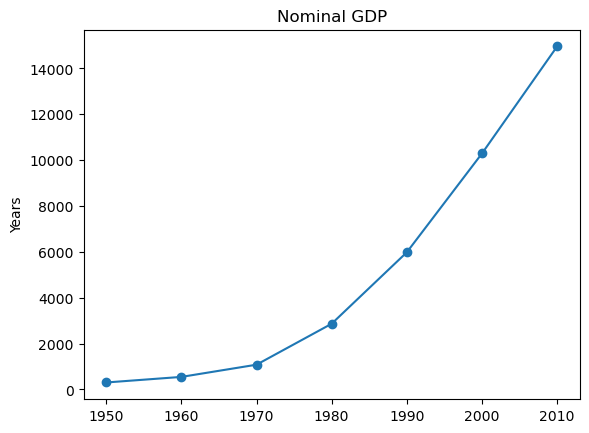

In [7]:
# O pyplot mantem um estado interno no qual podemos construir uma visualizacao passo a passo. Ao terminar, podemos salvar com savefig ou deixzala exibida no Output
# Criando um grafico simples
import matplotlib.pyplot as plt 

years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]

# Criando um grafico de linhas, anos no eixo x e, gdp no eixo y
plt.plot(years, gdp, 'o-') # AS strings representam a forma dos marcadores
plt.title("Nominal GDP") # Criando um titulo 
plt.ylabel("Billions of $") # Criando label do eixo Y
plt.ylabel("Years") # Criando label do eixo X
plt.show() # Plotando o Grafico

#### GRAFICOS DE BARRA

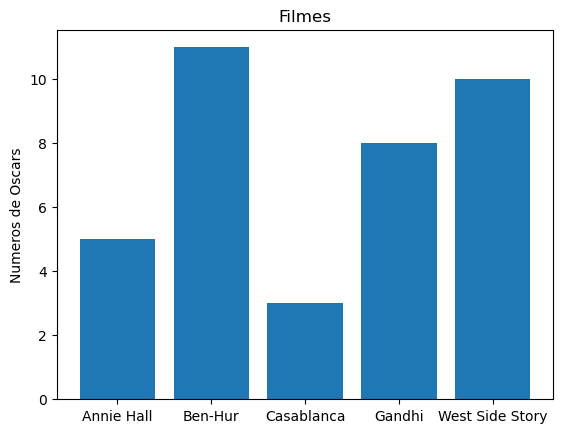

In [8]:
# Um conjunto de barras e uma opcao quando queremos mostrar a variaca de quantidade em um pequeno conjunto de itens

movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]

plt.bar(range(len(movies)), num_oscars) # O eixo X sao os filmes e o eixo Y A contagem de premios
plt.title("Filmes") # Titulo
plt.ylabel("Numeros de Oscars") # label eixo y
plt.xticks(range(len(movies)), movies) # Nomeando cada ticks do eixo X com o nome do filme
plt.show()


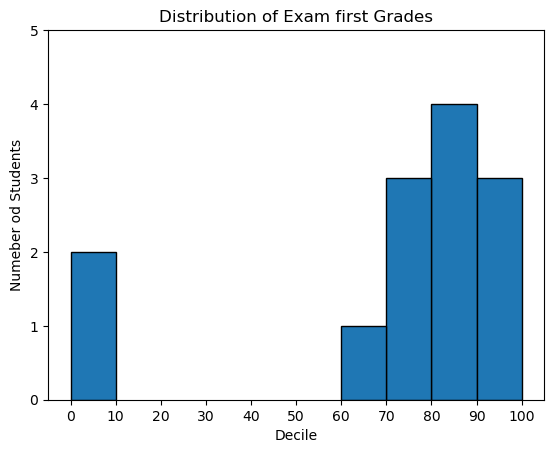

In [9]:
# Podemos utilizar o grafico de barra plotar um histograma de valores numericos agrupados e representar visualmente a distribuicao dos valores
from collections import Counter

grades = [83, 95, 91, 87, 70, 0, 85, 82, 100, 67, 73, 77, 0]

# Agrupando as notas por decil, mas colocando o 100 com o 90

histogram = Counter(min(grade // 10 * 10, 90) for grade in grades)

plt.bar([x + 5 for x in histogram.keys()], # Movendo as barras para a direita em 5
        histogram.values(), # Atribuindo a altura correta para cada barra
        10, # Atribuindo a largura de 10 para cada barra
        edgecolor=(0, 0, 0)) # Escurecendo as bordas das barras
plt.axis([-5, 105, 0, 5]) # Passando o eixo X de -5 a 105 e o eixo Y de 0 a 5
plt.xticks([10 * i for i in range(11)]) # Label do eixo X indo de 10 em 10
plt.xlabel("Decile") # Label do eixo X
plt.ylabel("Numeber od Students") # label do eixo Y
plt.title("Distribution of Exam first Grades") # Titulo do grafico
plt.show() # Plotando o grafico

#### GRAFICOS DE LINHAS

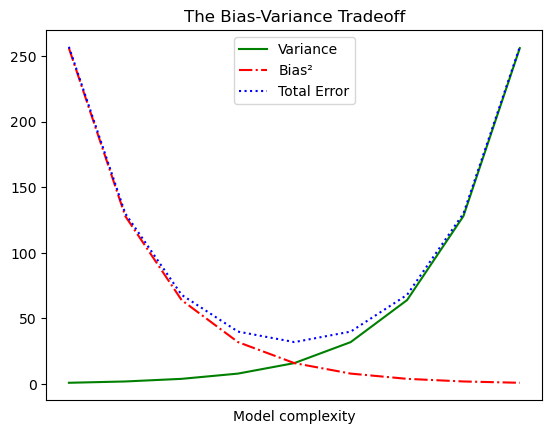

In [14]:
# O modelo de grafico e uma boopcao para mostrar tendencias

variance =  [1, 2, 4, 8, 16, 32, 64, 128, 256]
bias_squared = [256, 128, 64, 32, 16, 8, 4, 2, 1]
total_error = [x + y for x, y in zip(variance, bias_squared)]
xs = [i for i , _ in enumerate(variance)]

# Podemos fazer multiplas chamadas para plt.plot, para chamar multiplas series no mesmo grafico
plt.plot(xs, variance, 'g-', label='Variance') # Linha verde solida
plt.plot(xs, bias_squared, 'r-.', label='Bias²') # Linha vermelha de ponto tracejado
plt.plot(xs, total_error, 'b:', label='Total Error') # Linha pontilhada azul

plt.legend(loc=9) # Passando a legenda para Top Center
plt.xlabel("Model complexity")
plt.xticks([]) # Passando uma lista vazia para nao haver nenhum valor para xticks
plt.title("The Bias-Variance Tradeoff")
plt.show()

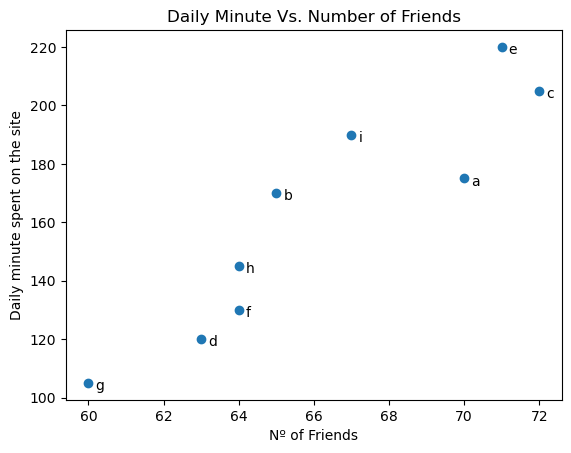

In [20]:
# O grafico de dispersao e uma opcao para representar as relacoes entre paraes de conjuntos de dados
# Ilustrando a relacao entre o numero de amigos dos usuarios e o numero de minutos que eles passam no site
friends = [ 70, 65, 72, 63, 71, 64, 60, 64, 67]
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

plt.scatter(friends, minutes)
# Rotulando cada ponto
for label, friend_count, minute_count in zip(labels, friends, minutes):
    plt.annotate(label, xy=(friend_count, minute_count), # Colocando um rotulo no seu respectivo ponto
    xytext=(5, -5), # Mas levemente deslocado
    textcoords='offset points')

plt.title("Daily Minute Vs. Number of Friends")
plt.xlabel("Nº of Friends")
plt.ylabel("Daily minute spent on the site")
plt.show()

## ALGEBRA LINEAR
#### - A algebra e o ramo da matematica que calcula espacos vetorais

#### VETORES
##### Na teoria vetores sao objetos que podem ser somados ou multiplicados por escalares (como, por exemplo, numeros) para formar outros vetores
##### Na pratica os vetores sao pontos em um espaco de dimensao finita.
##### Por exemplo se tivermos as alturas, pesos e idades de muitas pessoas, podemos tratar esses dados como vetores tridimensionais [height, weight, age] 

In [31]:
# A abortagem mais simple e representa um vetor e como uma lista de numeros
# Para isso, usaremos um alias de tipo indicando que um vetor e so uma list de floats

from typing import List

Vector = List[float] # CRIANDO A VARIAVEL VETOR PARA A ANOTACAO DE TIPO DO VETOR

height_weight_age = [70, # polegadas
                    107, # libras
                    40] # anos
grades = [95, # teste 1
        80, # teste 2
        75, # teste 3
        62] # teste 4       


In [32]:
# Como as listas em Python nao sao vetores, temos que construit essas ferramentas aritimeticas
# Primeiro e necessario somar dois vetores, pois a soma ou adicao de vetores ocorre por componente. Ou seja, se os vetores v e w tiverem
# o mesmo tamanho, a adicao produzira um vetor cujo primeiro elemento sera v[0] + w[0], cujo segundo elemento sera v[0] + w[0] e assim por diante
# Nao podemos adicionar vetores de tamanhos diferentes

# Forma de somar dois vetores
def add_vetor(v: Vector, w: Vector) -> Vector:
    """Soma os elementos correspondentes""" 
    assert len(v) == len(w), "Os vetores precisam possuir o mesmo tamanho"
    return [v_i + w_i for v_i, w_i in zip(v, w)]

assert add_vetor([1, 2, 3], [4, 5, 6]) == [5, 7, 9]

In [33]:
# Forma de subtrair dois vetores
def subtract_vector(v: Vector, w: Vector) -> Vector:
    """Subtrai os elementos correspondentes"""
    assert len(v) == len(w), "Os vetores precisam possuir o mesmo tamanho"
    return [v_i - w_i for v_i, w_i in zip(v, w)]

assert subtract_vector([5, 7, 9], [4, 5, 6,]) == [1, 2, 3]

In [48]:
# Podem existir casos aonde seja preciso somar uma lista de vetores por componente. Para isso criaremos um vetos onde
# o primeiro elemento seja a soma de todos os primeiros elementos, cujo o segundo elemento seja a soma de todos os 
# segundos elementos e assim por diante
def vector_sum(vectors: List[Vector]) -> Vector:
    """Soma todos os elementos correspondentes"""
    # Verificando se os valores nao estao vazios 
    assert vectors, "Nenhum vetor fornecido"
    # Verificando se os vetores sao do mesmo tamanho
    num_elements = len(vectors[0])
    assert all(len(v) == num_elements for v in vectors), "Vetores de tamanhos diferentes"
    # O elemento de nº i do resultado e a soma de todo vector[i]
    return [sum(vector[i] for vector in vectors) for i in range(num_elements)]


vector_sum([[1, 2], [3, 4], [5, 6]])



[9, 12]

In [52]:
# Multiplicar um vetor por um escalar, multiplicando cada elemento do vetor pelo numero em questao
def scalar_multiply(c: float, v: Vector) -> Vector:
    """Multiplica cada elemento por c"""
    return [c * v_i for v_i in v]

scalar_multiply(0.3333333333333333, [9, 12])
 

[3.0, 4.0]

In [43]:
# Computar a media dos componentes de uma lista de vetores
def vector_mean(vectors: List[Vector]) -> Vector:
    """Computa a media dos elementos"""
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

assert vector_mean([[1, 2], [3, 4], [5, 6]]) == [3, 4] # 

In [56]:
# Outra ferramenta e o produto escalar (dot product). O produto escalar de dois vetores e a soma dos produtos
# por componentes 
def dot_product(v: Vector, w: Vector) -> float:
    """Computa v_1 * w_1 + ... + v_n * w_n"""
    assert len(v) == len(w), " Vetores precisam possui o mesmo tamanho"
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

assert dot_product([1, 2, 3], [4, 5, 6]) == 32 # Out 1 * 4 + 2 * 5 + 3 * 6

# Quando w tem magnitude 1, o produto escalar mede a extensao do vetor v na direcao w. Em outras palavras, esse e
# comprimento do vetor quando voce projeta v em w 

In [59]:
# Computar a soma dos quadrados de um vetor
def sum_squares_vectors(v: Vector) -> float:
    """Retorna v_1 * v_1 + ... + v_n * v_n"""
    return dot_product(v, v)

assert sum_squares_vectors([3, 4]) == 14 # 1 * 1 + 2 * 2 + 3 * 3

25

In [62]:
# Podemos usar esse valor para computar a magnitude (ou comprimento) do vetor
import math 

def magnitude(v: Vector) -> float:
    """Retorna a magnitude (ou comprimento) de v"""
    return math.sqrt(sum_squares_vectors(v)) # Retornando a raiz quadrada do valor gerado pela sum_squares_vectors 

assert magnitude([3, 4]) == 5 # 

In [64]:
# Agora vamos computar a distancia entre os dois vetores
def square_distance(v: Vector, w: Vector) -> float:
    """Computa (v_1 - w_1)² + ... + (v_n - w_n)²"""
    return sum_squares_vectors(subtract_vector(v, w))

def distance(v: Vector, w: Vector) -> float:
    """Computa a distancia entre v e w"""
    return math.sqrt(square_distance(v, w))

# Para melhor o desempenho podemos utilizar o NumPy que contem uma classe array de alto desempenho com diversas 
# operacoes aritimeticas


#### MATRIZES